In [20]:
# Exemplo 1 – load_iris() e DataFrame sem alvo.
from sklearn.datasets import load_iris
import pandas as pd
# Nomes que serão dados as colunas na mesma ordem em que aparecem
iris_cols = [ 'Comprimento das Sépalas',
 'Largura das Sépalas',
 'Comprimento das Pétalas',
 'Largura das Pétalas' ]
# Desmembramento por ordem: Atributos previsores; Atributo alvo; Nomes das classes reais;
# Descrição do conjunto de dados; Nomes dos atributos previsores;
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
y_names = iris_data.target_names
DESCR = iris_data.DESCR

iris_cols = iris_data.feature_names
df = pd.DataFrame(X, columns=iris_cols)
df.describe()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

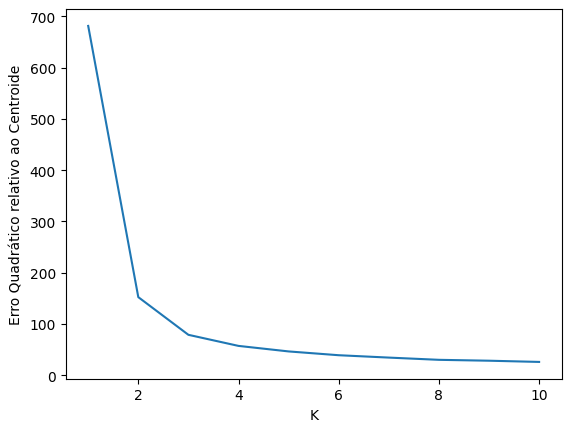

    Silhueta  Davies-Bouldin  Calinski-Harabasz
1   0.000000        0.000000           0.000000
2   0.681046        0.404293         513.924546
3   0.552819        0.661972         561.627757
4   0.498051        0.780307         530.765808
5   0.488749        0.805965         495.541488
6   0.364834        0.914158         473.850607
7   0.356862        0.962751         447.963359
8   0.359745        0.926576         439.460715
9   0.337285        1.026210         406.239024
10  0.323807        0.980469         392.532187


In [18]:
# Exemplo 2 – Seleção da Quantidade de Clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as pyp
import pandas as pd
from sklearn.metrics.cluster import silhouette_score, davies_bouldin_score, calinski_harabasz_score

erros = []
indices = [[0, 0, 0]]
K_set = range(1, 11)
for i in K_set:
    kmeans = KMeans(n_clusters=i, random_state=0)
    prevs = kmeans.fit_predict(X)
    erros.append(kmeans.inertia_)

    if (i > 1):
        sil = silhouette_score(X, prevs, random_state=0)
        dav = davies_bouldin_score(X, prevs)
        cal = calinski_harabasz_score(X, prevs)
        indices = indices + [[sil, dav, cal]]

pyp.plot(K_set, erros)
pyp.xlabel('K')
pyp.ylabel('Erro Quadrático relativo ao Centroide')
pyp.show()

df_indices = pd.DataFrame(data=indices, columns=['Silhueta', 'Davies-Bouldin', 'Calinski-Harabasz'], index=K_set)
print(df_indices)


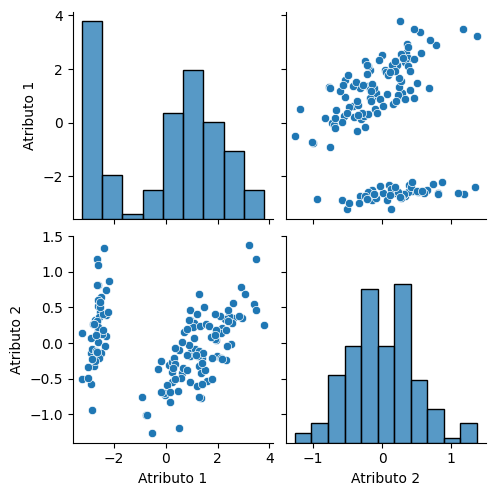

In [19]:
# Exemplo 3 – Redução de dimensionalidade com PCA
from sklearn.decomposition import PCA
import seaborn as sb
pca = PCA(n_components=2, random_state = 0)
Xpca = pca.fit_transform(X)
sb.pairplot(pa.DataFrame(Xpca, columns=['Atributo 1', 'Atributo 2']))

In [21]:
# Exemplo 4 – Descrição dos conjuntos com e sem mudança de escala
from sklearn.preprocessing import StandardScaler
import numpy as np
Xps = StandardScaler().fit_transform(Xpca)
XpcaXps = np.concatenate((Xpca, Xps), axis=1)
df_XpcaXps = pa.DataFrame(XpcaXps, columns=['Original 1',
 'Original 2',
 'Balanceado 1',
 'Balanceado 2'])
display(df_XpcaXps.describe())

Original 1    Original 2  Balanceado 1  Balanceado 2
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -3.031649e-15 -9.000208e-16  4.736952e-17  2.368476e-17
std    2.056269e+00  4.926162e-01  1.003350e+00  1.003350e+00
min   -3.223804e+00 -1.265971e+00 -1.573045e+00 -2.578503e+00
25%   -2.530348e+00 -3.254152e-01 -1.234676e+00 -6.627987e-01
50%    5.546193e-01 -2.215678e-02  2.706248e-01 -4.512844e-02
75%    1.550143e+00  3.249152e-01  7.563877e-01  6.617803e-01
max    3.795645e+00  1.374165e+00  1.852074e+00  2.798870e+00

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


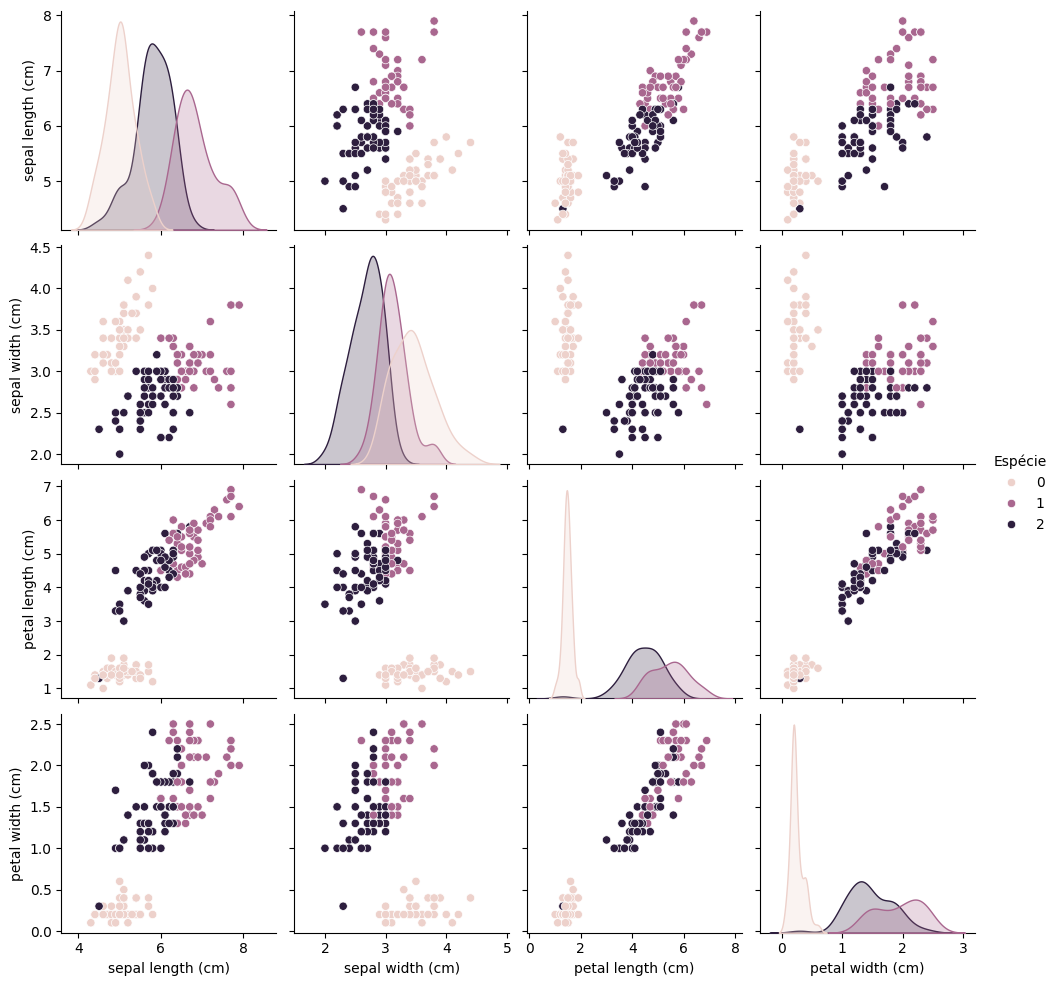

In [22]:
# Exemplo 5 – Gráfico por pares de atributos dos clusters formados
clusters = KMeans(n_clusters=3).fit_predict(Xps)
df_clusters = df.copy()
df_clusters['Espécie'] = clusters
sb.pairplot(df_clusters, hue='Espécie')

In [24]:
# Exemplo 6 – Rotulação
# Rotula os grupos na mesma ordem em que aparecem para load_iris()
df_clusters['Espécie'] = df_clusters['Espécie'].map({0: 'setosa', 1: 'virginica', 2: 'versicolor'})
# Mapeia novamente os rótulos para os índices de acordo com load_iris()
y_clusters = df_clusters['Espécie'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values

In [25]:
# Exemplo 7 – Busca pelos parâmetros adequados do SVM
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X_treino, X_teste, y_treino, y_teste_clusters = train_test_split(X, y_clusters, random_state=50)
_, _, _, y_teste_real = train_test_split(X, y, random_state=50)

Cs = [ 0.001, 0.01, 0.1, 1, 100, 1000 ]
gammas = [ 1e-2, 1e-3, 1e-4, 1e-5 ]
params_list = [
 {'kernel': ['linear'], 'C': Cs},
 {'kernel': ['poly'], 'C': Cs, 'gamma': gammas},
 {'kernel': ['rbf'], 'C': Cs, 'gamma': gammas}
 ]

grid = GridSearchCV(svm.SVC(probability=True, max_iter=1000000, random_state=0), params_list, scoring='accuracy')
grid.fit(X_treino, y_treino)

print('Melhores parâmetros: {0}\n'.format(grid.best_params_))
medias = grid.cv_results_['mean_test_score']
ranks = grid.cv_results_['rank_test_score']
desvios = grid.cv_results_['std_test_score']
params_set = grid.cv_results_['params']
zipped = zip(ranks, medias, desvios, params_set)
sorted_zip = sorted(zipped, key=lambda x: x[0])
for rank, media, desvio, params in sorted_zip:
 print('Ranking: {0:0.4f} - Média: {1:0.04f} - Desvio: {2:0.04f} –Parâmetros {3}'.format(rank, media, desvio, params))

Melhores parâmetros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Ranking: 1.0000 - Média: 0.9913 - Desvio: 0.0174 –Parâmetros {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Ranking: 1.0000 - Média: 0.9913 - Desvio: 0.0174 –Parâmetros {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Ranking: 1.0000 - Média: 0.9913 - Desvio: 0.0174 –Parâmetros {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Ranking: 4.0000 - Média: 0.9826 - Desvio: 0.0213 –Parâmetros {'C': 1, 'kernel': 'linear'}
Ranking: 4.0000 - Média: 0.9826 - Desvio: 0.0213 –Parâmetros {'C': 100, 'kernel': 'linear'}
Ranking: 4.0000 - Média: 0.9826 - Desvio: 0.0213 –Parâmetros {'C': 1000, 'kernel': 'linear'}
Ranking: 4.0000 - Média: 0.9826 - Desvio: 0.0213 –Parâmetros {'C': 100, 'gamma': 0.01, 'kernel': 'poly'}
Ranking: 4.0000 - Média: 0.9826 - Desvio: 0.0213 –Parâmetros {'C': 1000, 'gamma': 0.01, 'kernel': 'poly'}
Ranking: 9.0000 - Média: 0.9466 - Desvio: 0.0168 –Parâmetros {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Ranking: 9.0000 - Média: 0.94

In [26]:
# Exemplo 8 – Treinamento SVM e medição de precisão entre real e simulado

model = svm.SVC(C = 100, gamma = 1e-2, kernel = 'rbf', max_iter=1000000, random_state=0)
model.fit(X_treino, y_treino)
y_svm_prevs = model.predict(X_teste)
display(
 accuracy_score(y_teste_clusters, y_svm_prevs),
 accuracy_score(y_teste_real, y_svm_prevs),
 accuracy_score(y_teste_real, y_teste_clusters)
)

0.9736842105263158

0.868421052631579

0.8421052631578947